In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv("/content/Google_Stock_Price_Train.csv")
data_train.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Google_Stock_Price_Train.csv'

In [ ]:
train_set=data_train[['Open']]
train_set.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
train_set=mms.fit_transform(train_set)
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
xtrain=[]
ytrain=[]
for i in range (60,len(data_train)):
  xtrain.append(train_set[i-60:i,0])
  ytrain.append(train_set[i,0])

In [ ]:
np.array(xtrain).shape


(1198, 60)

In [ ]:
np.array(ytrain).shape

(1198,)

In [ ]:
xtrain,ytrain=np.array(xtrain),np.array(ytrain)

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
print(xtrain.shape)

(1198, 60, 1)


In [ ]:
import keras as tf

In [ ]:
model = tf.models.Sequential()
model.add(tf.layers.SimpleRNN(64,input_shape=(60,1),activation="tanh",return_sequences=False))
model.add(tf.layers.Dropout(0.2))
model.add(tf.layers.Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.fit(xtrain,ytrain,epochs=100)


Epoch 1/100
38/38 [==============================] - 5s 33ms/step - loss: 0.0611
Epoch 2/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0076
Epoch 3/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0038
Epoch 7/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 1s 32ms/step - loss: 0.0035
Epoch 9/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0030
Epoch 10/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0033
Epoch 11/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0029
Epoch 13/100
38/38 [=====

In [ ]:
data_test=pd.read_csv("/content/Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
asp=data_test[['Open']]
asp.head()


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [ ]:
dataset_total =pd.concat((data_train['Open'],data_test['Open']),axis=0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs=dataset_total[len(dataset_total)-len(data_test)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
len(inputs)

80

In [ ]:
inputs=inputs.reshape(inputs.shape[0],1)
inputs=mms.transform(inputs)
inputs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [ ]:
xtest=[]
for i in range(60,len(inputs)):
  xtest.append(inputs[i-60:i,0])

In [ ]:
xtest=np.array(xtest)
xtest.shape

(20, 60)

In [ ]:
pred_stock_price = model.predict(xtest)
pred_stock_price = mms.inverse_transform(pred_stock_price)
pred_stock_price

1/1 [==============================] - 0s 151ms/step


array([[777.6455 ],
       [778.39667],
       [781.96844],
       [786.67267],
       [789.6379 ],
       [799.32544],
       [805.09845],
       [802.0148 ],
       [799.8175 ],
       [804.8135 ],
       [804.5634 ],
       [802.8564 ],
       [801.0852 ],
       [799.78314],
       [803.8973 ],
       [810.1626 ],
       [820.7611 ],
       [831.0967 ],
       [830.42236],
       [816.45844]], dtype=float32)

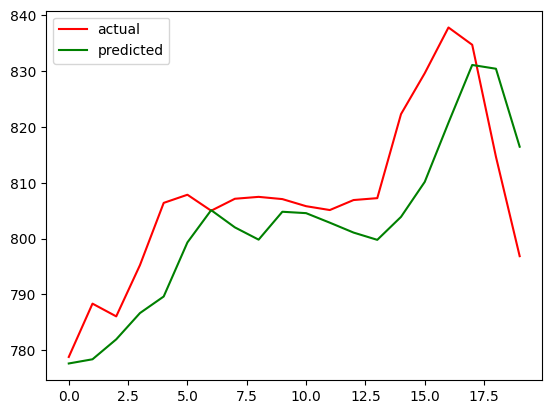

In [ ]:
plt.plot(asp,color="red",label="actual")
plt.plot(pred_stock_price,color="green",label="predicted")
plt.legend()
plt.show()